In [85]:
import pandas as pd
df = pd.read_csv("/content/Employee (2).csv")
df

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1
...,...,...,...,...,...,...,...,...,...
4648,Bachelors,2013,Bangalore,3,26,Female,No,4,0
4649,Masters,2013,Pune,2,37,Male,No,2,1
4650,Masters,2018,New Delhi,3,27,Male,No,5,1
4651,Bachelors,2012,Bangalore,3,30,Male,Yes,2,0


**Exploratory Data Analysis**

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [87]:
df.nunique()

Education                     3
JoiningYear                   7
City                          3
PaymentTier                   3
Age                          20
Gender                        2
EverBenched                   2
ExperienceInCurrentDomain     8
LeaveOrNot                    2
dtype: int64

In [88]:
# Education type
df.Education.value_counts()

Education
Bachelors    3601
Masters       873
PHD           179
Name: count, dtype: int64

In [89]:
df['Age'].min()

22

In [90]:
df['Age'].max()

41

In [91]:
df['Age'].mean()

29.393294648613796

In [92]:
df.groupby(["Education"])["PaymentTier"]._value_counts()
#Count of employee with each paymenttier in different Education field

Education  PaymentTier
Bachelors  3              2885
           2               543
           1               173
Masters    3               462
           2               355
           1                56
PHD        3               145
           2                20
           1                14
Name: PaymentTier, dtype: int64

In [93]:
#count of gender in the Education category
df.groupby(["Education"])["Gender"]._value_counts()

Education  Gender
Bachelors  Male      2166
           Female    1435
Masters    Male       502
           Female     371
PHD        Male       110
           Female      69
Name: Gender, dtype: int64

**visualization**

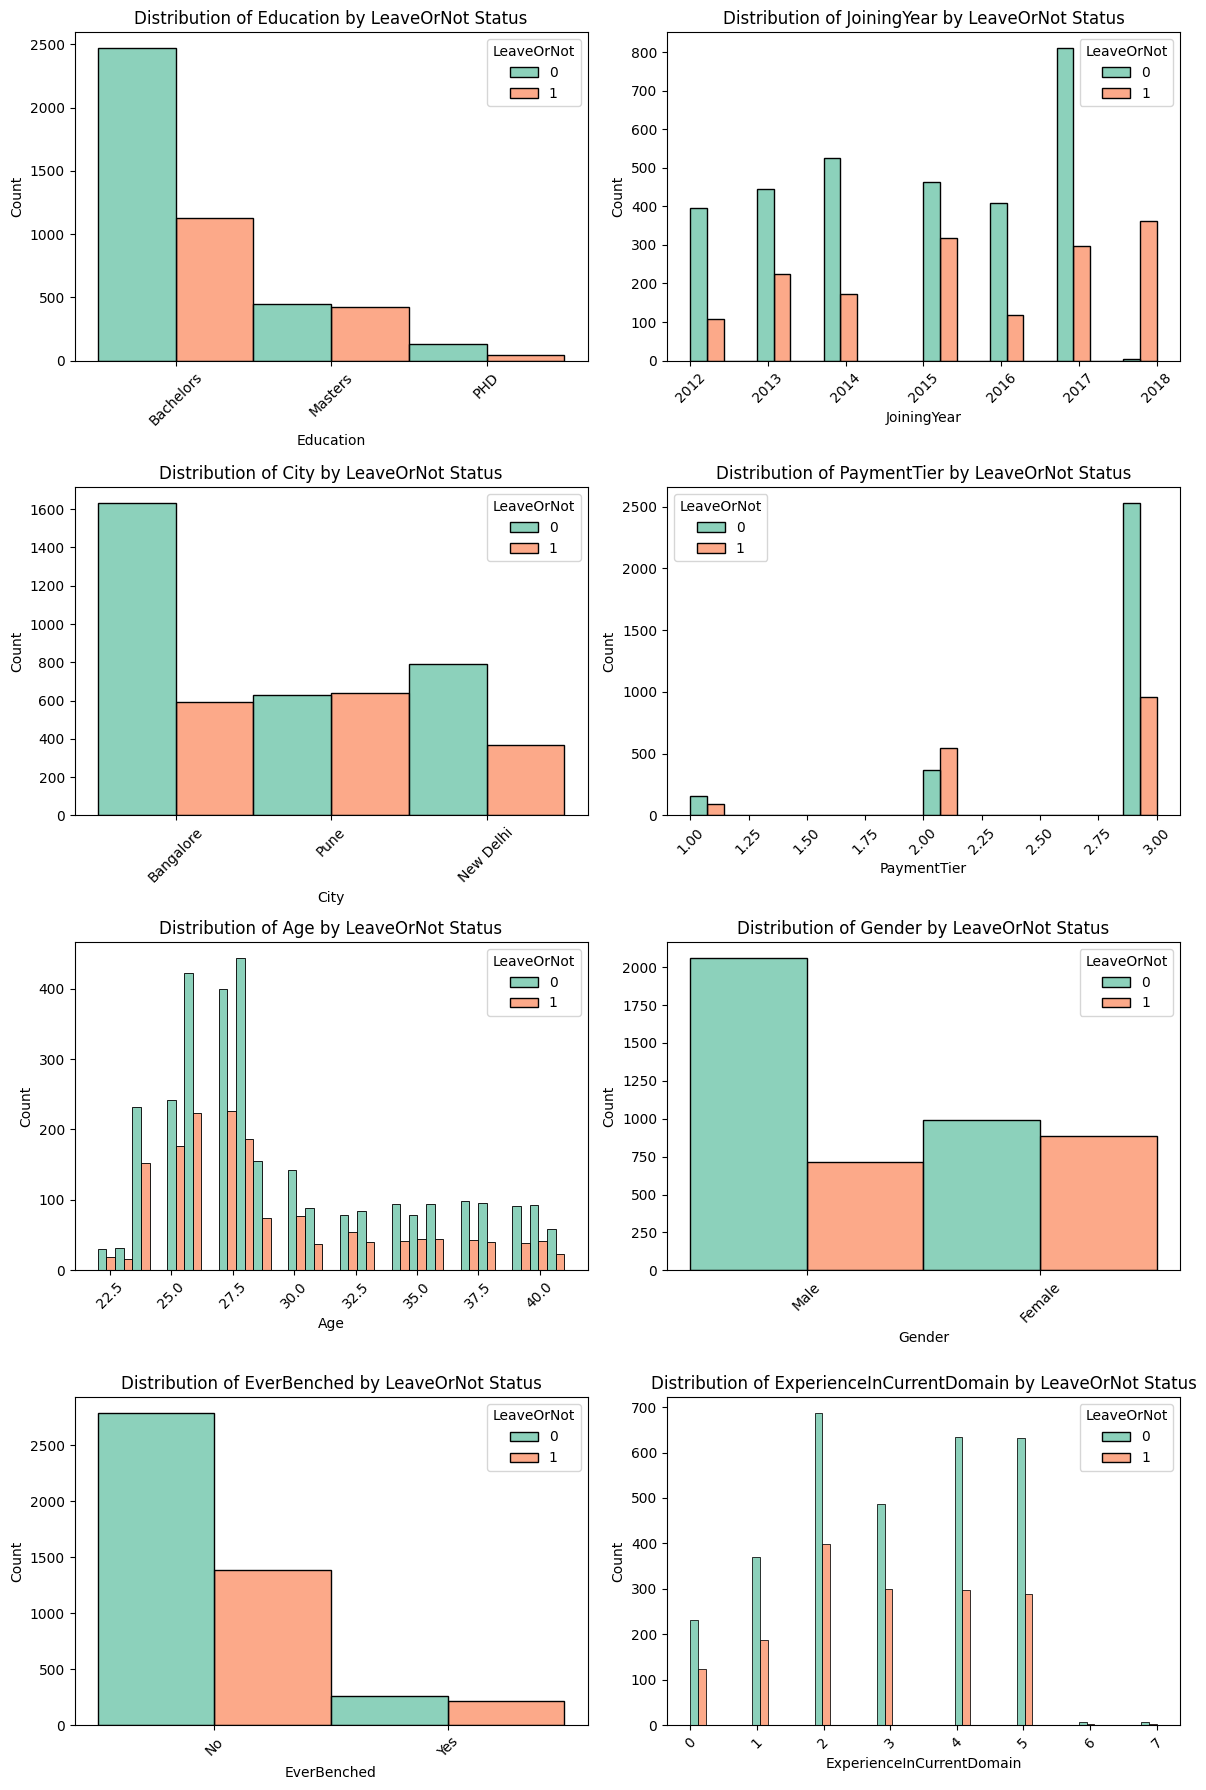

In [94]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

# Set a specific color palette
sns.set_palette("Set2")

# Adjust the overall figure size
plt.figure(figsize=(12, 18))

# Loop through all columns except the target column 'LeaveOrNot'
for i, col in enumerate(df.columns[:-1], 1):
    plt.subplot(4, 2, i)
    sns.histplot(data=df, x=col, hue='LeaveOrNot', multiple='dodge', palette='Set2')
    plt.title(f"Distribution of {col} by LeaveOrNot Status")
    plt.tight_layout()
    plt.xticks(rotation=45)

# Display the plot
plt.show()


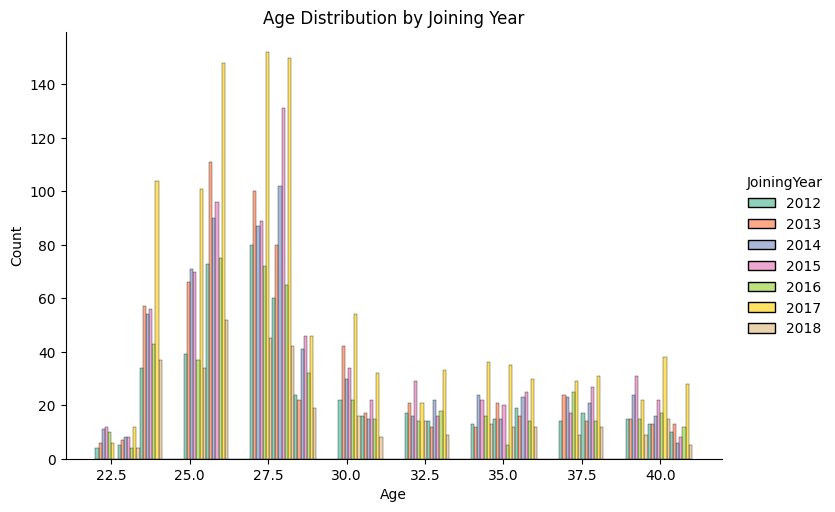

In [95]:

# Set a specific color palette
sns.set_palette("Set2")

# Create a displot with hue based on 'JoiningYear'
sns.displot(data=df, x='Age', hue='JoiningYear', multiple='dodge', palette='Set2', aspect=1.5)

# Adjust title and labels
plt.title('Age Distribution by Joining Year')
plt.xlabel('Age')
plt.ylabel('Count')

# Display the plot
plt.show()


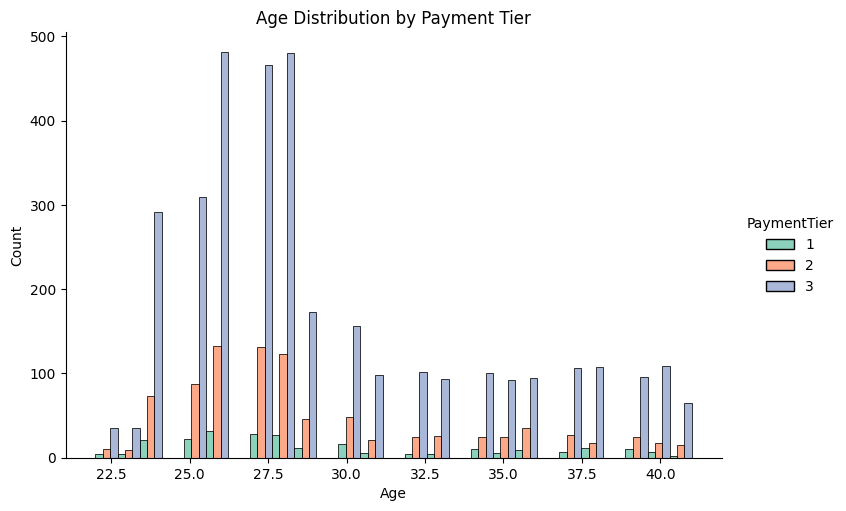

In [96]:

# Set a specific color palette
sns.set_palette("Set2")

# Create a displot with hue based on 'PaymentTier'
sns.displot(data=df, x='Age', hue='PaymentTier', multiple='dodge', palette='Set2', aspect=1.5)

# Adjust title and labels
plt.title('Age Distribution by Payment Tier')
plt.xlabel('Age')
plt.ylabel('Count')

# Display the plot
plt.show()


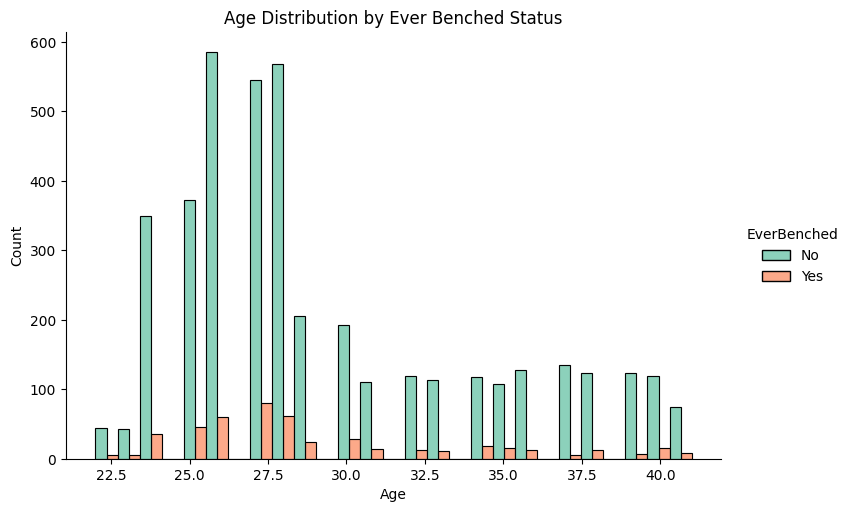

In [97]:
# Set a specific color palette
sns.set_palette("Set2")

# Create a displot with hue based on 'EverBenched'
sns.displot(data=df, x='Age', hue='EverBenched', multiple='dodge', palette='Set2', aspect=1.5)

# Adjust title and labels
plt.title('Age Distribution by Ever Benched Status')
plt.xlabel('Age')
plt.ylabel('Count')

# Display the plot
plt.show()


**Preprocessing**

finding outliers

In [98]:
from sklearn.preprocessing import LabelEncoder

# Instantiate LabelEncoder
ak = LabelEncoder()
categories_cols = ["Education", "City", "Gender", "EverBenched"]

# Apply LabelEncoder
for label in categories_cols:
    df[label] = ak.fit_transform(df[label])

# Display the encoded dataset
df.head()


,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,0,2017,0,3,34,1,0,0,0
1,0,2013,2,1,28,0,0,3,1
2,0,2014,1,3,38,0,0,2,0
3,1,2016,0,3,27,1,0,5,1
4,1,2017,2,3,24,1,1,2,1


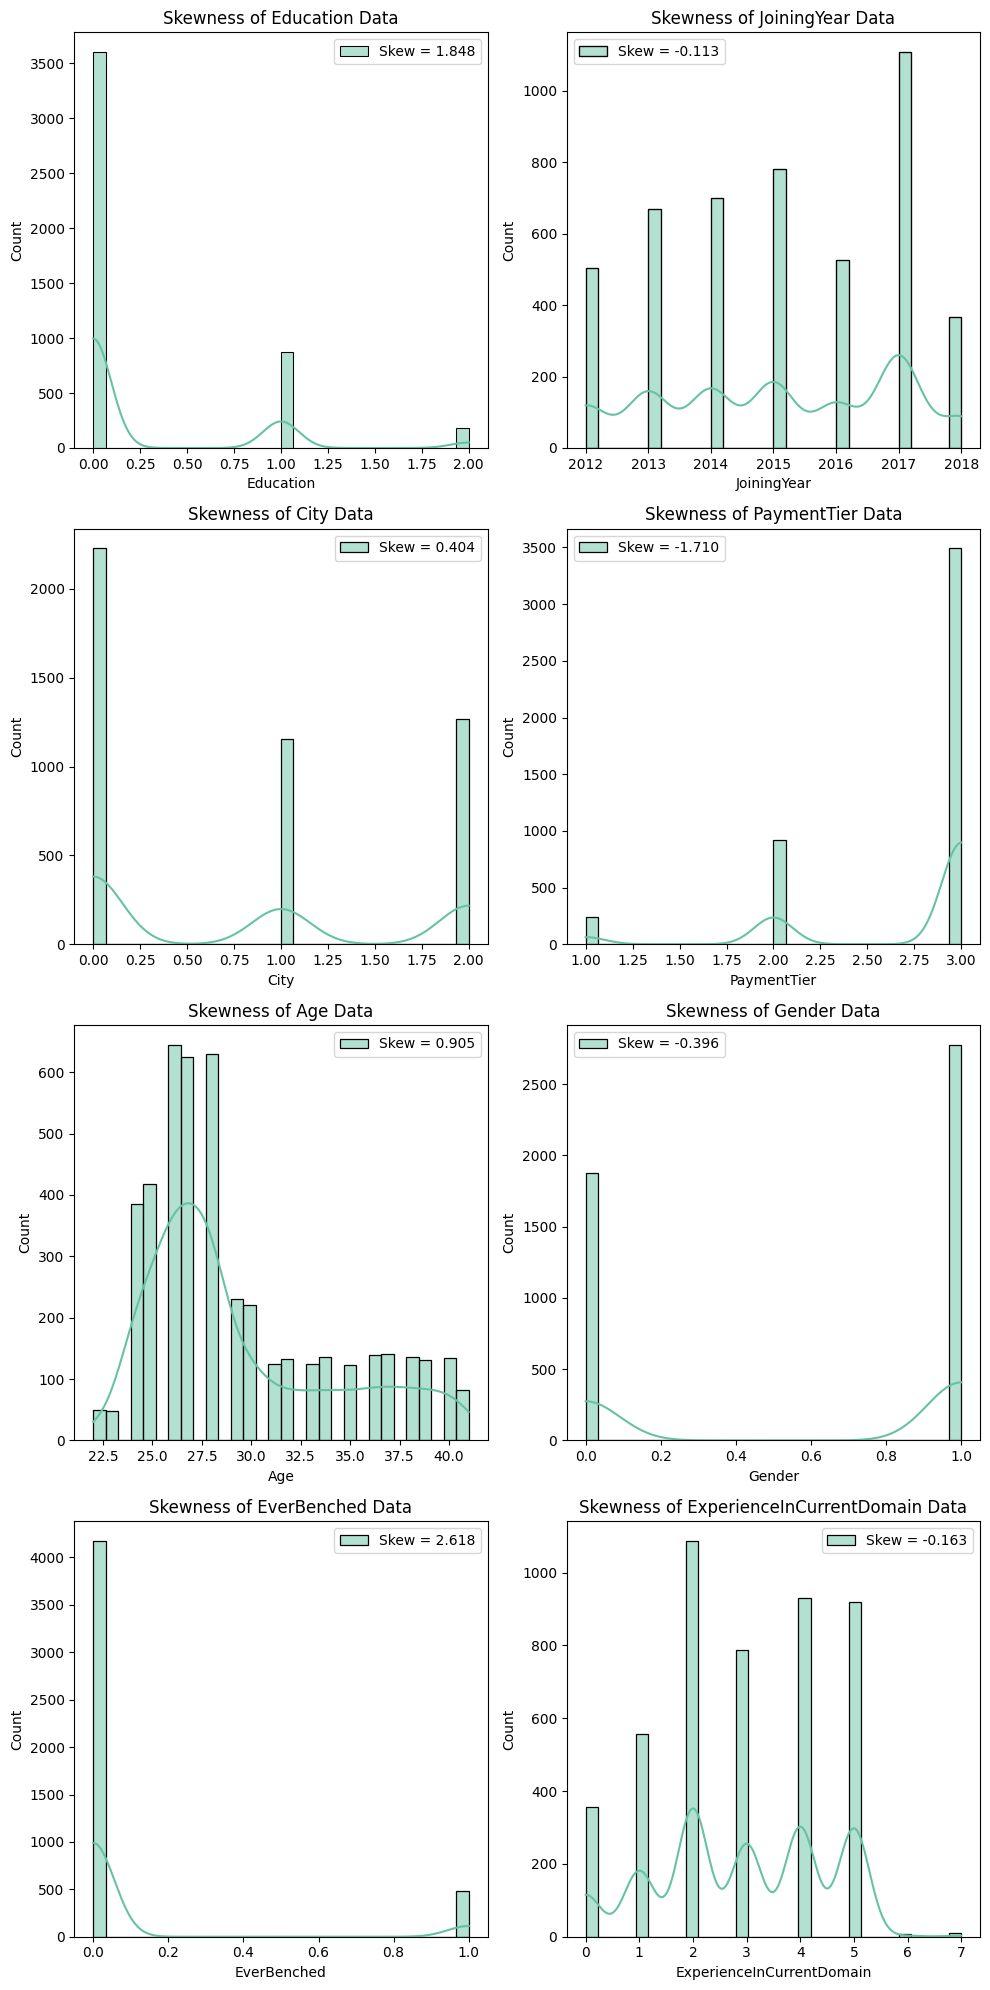

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot skewness for all features
plt.figure(figsize=(10, 20))
for i, col in enumerate(df.columns[:-1], 1):
    plt.subplot(4, 2, i)
    skewness = df[col].skew()
    sns.histplot(df[col], label=f"Skew = {skewness:.3f}", bins=30, kde=True)
    plt.title(f"Skewness of {col} Data")
    plt.legend(loc="best")
    plt.tight_layout()

plt.show()



**MODEL SELECTION**

           LOG       SVC       DTC       RFC       GBC       ABC       KNC
ACC   0.703608  0.662371  0.800687  0.826460  0.841065  0.790378  0.776632
PREC  0.609091  0.000000  0.718157  0.775216  0.848993  0.768953  0.722408
REC   0.340967  0.000000  0.674300  0.684478  0.643766  0.541985  0.549618
F1    0.437194  0.000000  0.695538  0.727027  0.732272  0.635821  0.624277


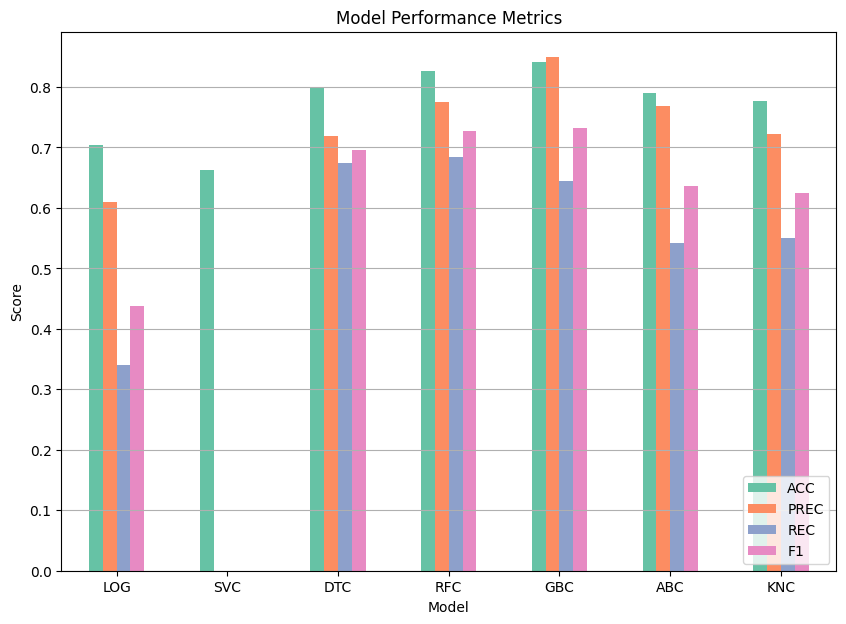

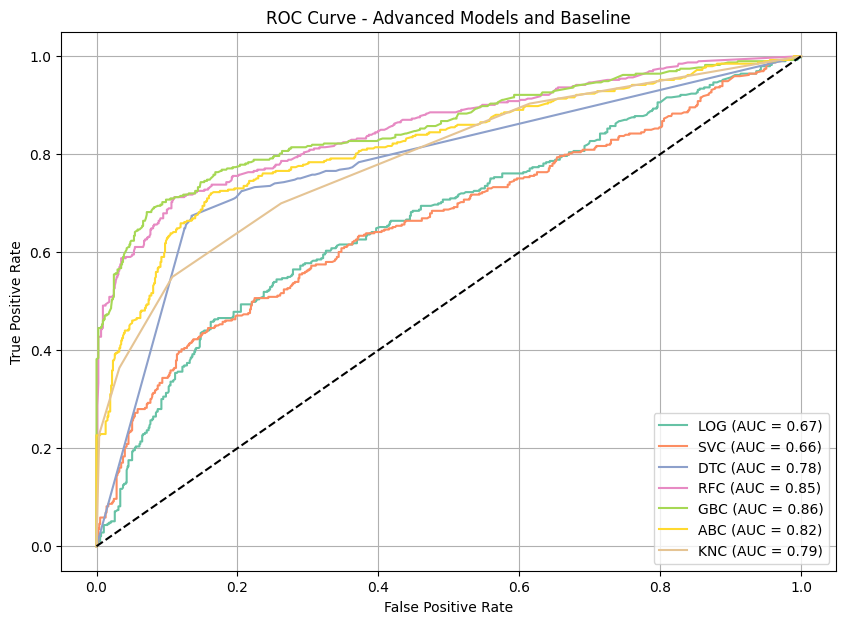

In [100]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score

# Split the data into features (X) and target (y)
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Initialize baseline model
logistic_model = LogisticRegression()

# Train and predict for the baseline model
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)
y_prob_logistic = logistic_model.predict_proba(X_test)[:, 1]

# Compute metrics for the baseline model
acc_logistic = accuracy_score(y_test, y_pred_logistic)
prec_logistic = precision_score(y_test, y_pred_logistic)
rec_logistic = recall_score(y_test, y_pred_logistic)
f1_logistic = f1_score(y_test, y_pred_logistic)

# Define advanced models
models = {
    "SVC": SVC(probability=True),
    "DTC": DecisionTreeClassifier(),
    "RFC": RandomForestClassifier(),
    "GBC": GradientBoostingClassifier(),
    "ABC": AdaBoostClassifier(),
    "KNC": KNeighborsClassifier()
}

# Function to train models and predict
def train_and_predict(models, X_train, X_test, y_train):
    predictions = {}
    probabilities = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        predictions[name] = model.predict(X_test)
        if hasattr(model, 'predict_proba'):
            probabilities[name] = model.predict_proba(X_test)[:, 1]
        else:
            probabilities[name] = model.decision_function(X_test)
    return predictions, probabilities

# Function to get model scores
def model_scores(X_train, X_test, y_train, y_test):
    predictions, probabilities = train_and_predict(models, X_train, X_test, y_train)

    accuracy = {name: accuracy_score(y_test, pred) for name, pred in predictions.items()}
    precision = {name: precision_score(y_test, pred) for name, pred in predictions.items()}
    recall = {name: recall_score(y_test, pred) for name, pred in predictions.items()}
    f1 = {name: f1_score(y_test, pred) for name, pred in predictions.items()}

    return accuracy, precision, recall, f1

# Compute scores for advanced models
acc, prec, rec, f_1 = model_scores(X_train, X_test, y_train, y_test)

# Combine scores into a DataFrame
scores = pd.DataFrame({
    "LOG": [acc_logistic, prec_logistic, rec_logistic, f1_logistic],
    "SVC": [acc['SVC'], prec['SVC'], rec['SVC'], f_1['SVC']],
    "DTC": [acc['DTC'], prec['DTC'], rec['DTC'], f_1['DTC']],
    "RFC": [acc['RFC'], prec['RFC'], rec['RFC'], f_1['RFC']],
    "GBC": [acc['GBC'], prec['GBC'], rec['GBC'], f_1['GBC']],
    "ABC": [acc['ABC'], prec['ABC'], rec['ABC'], f_1['ABC']],
    "KNC": [acc['KNC'], prec['KNC'], rec['KNC'], f_1['KNC']]
}, index=["ACC", "PREC", "REC", "F1"])

# Print the scores DataFrame
print(scores)

# Optional: Plot the scores DataFrame
scores.T.plot(kind='bar', figsize=(10, 7))
plt.title("Model Performance Metrics")
plt.xlabel("Model")
plt.ylabel("Score")
plt.legend(loc="lower right")
plt.grid(axis='y')
plt.xticks(rotation=0)
plt.show()

# Plot ROC curve for advanced models including logistic regression
def plot_roc(models, y_test, probabilities, logistic_probs):
    plt.figure(figsize=(10, 7))
    # Add logistic regression ROC curve
    fpr_logistic, tpr_logistic, _ = roc_curve(y_test, logistic_probs)
    auc_logistic = roc_auc_score(y_test, logistic_probs)
    plt.plot(fpr_logistic, tpr_logistic, label=f"LOG (AUC = {auc_logistic:.2f})")

    for name, prob in probabilities.items():
        fpr, tpr, _ = roc_curve(y_test, prob)
        auc_score = roc_auc_score(y_test, prob)
        plt.plot(fpr, tpr, label=f"{name} (AUC = {auc_score:.2f})")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve - Advanced Models and Baseline")
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

# Train and predict to get probabilities for advanced models
_, probabilities = train_and_predict(models, X_train, X_test, y_train)

# Plot ROC curve for advanced models and logistic regression
plot_roc(models, y_test, probabilities, y_prob_logistic)


The ROC curve analysis and performance metrics indicate that the Gradient Boosting Classifier (GBC) is the superior model among those evaluated. It has the highest Area Under the Curve (AUC) score of 0.86, signifying its strong capability to distinguish between the classes across various thresholds. Furthermore, GBC also leads in accuracy (84.1%) and precision (84.9%), demonstrating its effectiveness in correctly identifying positive cases and minimizing false positives. This model outperforms the others in handling the given dataset and is likely the best choice for scenarios where both accuracy and the ability to discern between classes effectively are critical.

<Figure size 1200x800 with 0 Axes>

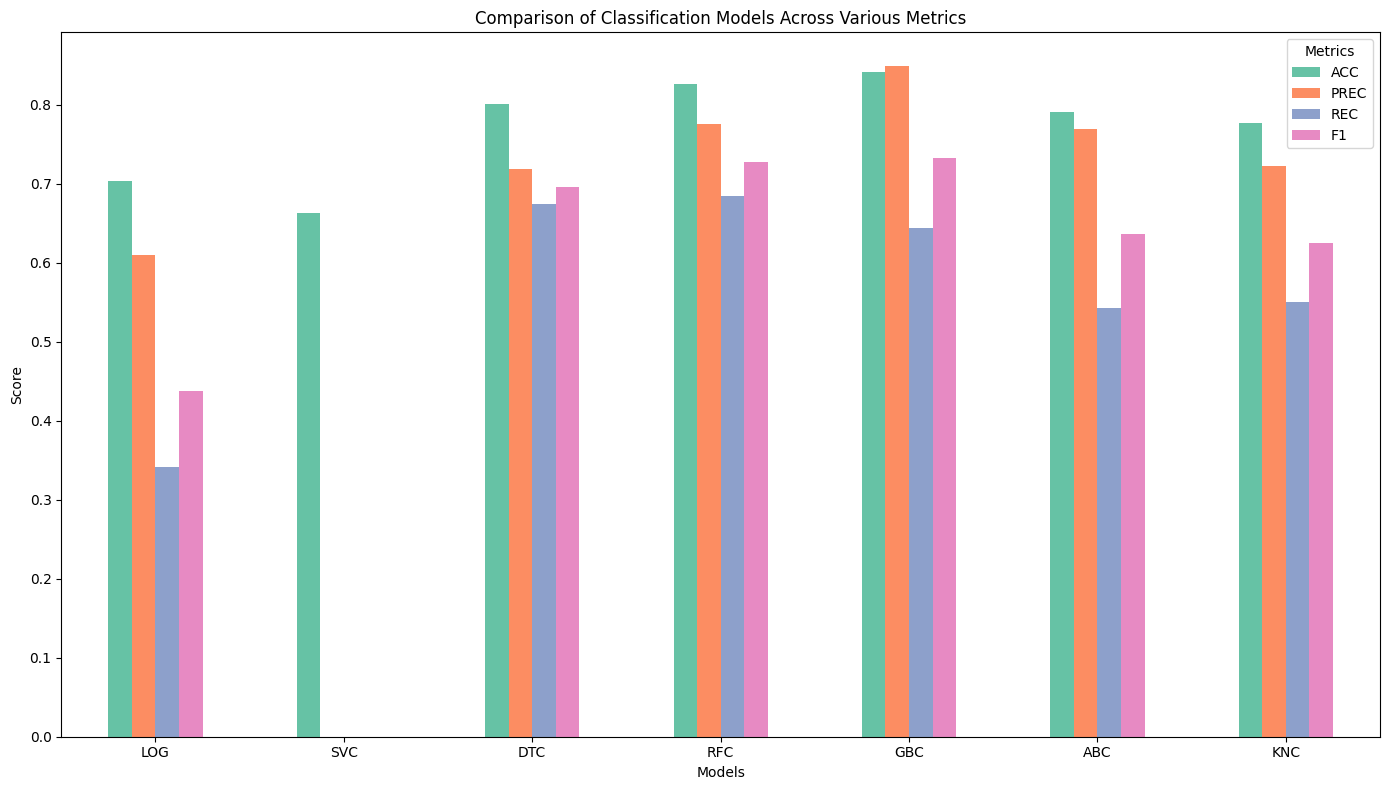

The best model is GBC, showing superior performance across multiple metrics.


In [101]:
# Plot scores using a bar plot
plt.figure(figsize=(12, 8))
sns.set_palette("Set2")
scores.T.plot(kind='bar', figsize=(14, 8), rot=0, title="Model Performance Comparison")

plt.ylabel("Score")
plt.xlabel("Models")
plt.legend(title="Metrics")
plt.title("Comparison of Classification Models Across Various Metrics")
plt.tight_layout()
plt.show()

# Interpretation
best_model = 'GBC'
print(f"The best model is {best_model}, showing superior performance across multiple metrics.")

GradientBoostingClassifier has highest accuracy/precision/recall/f1 score on other models.Now Let's perform tuning.

**hyperparameter tuning**

In [102]:
from sklearn.model_selection import train_test_split, GridSearchCV
# Hyperparameter tuning for Gradient Boosting Classifier
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0],
    'min_samples_split': [2, 4, 6]
}

# Initialize the Gradient Boosting Classifier
gbc = GradientBoostingClassifier(random_state=0)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=gbc, param_grid=param_grid,
                           scoring='accuracy', cv=5, verbose=1, n_jobs=-1)

# Fit the model using GridSearchCV
grid_search.fit(X_train, y_train)

# Extract the best parameters
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("\nBest Parameters: ", best_params)
print("Best Cross-Validation Score: ", best_score)

# Evaluate the tuned model
best_gbc = GradientBoostingClassifier(**best_params, random_state=0)
best_gbc.fit(X_train, y_train)
y_pred_gbc = best_gbc.predict(X_test)

# Evaluation metrics
accuracy_gbc = accuracy_score(y_test, y_pred_gbc)
precision_gbc = precision_score(y_test, y_pred_gbc)
recall_gbc = recall_score(y_test, y_pred_gbc)
f1_gbc = f1_score(y_test, y_pred_gbc)

print("\nTuned Gradient Boosting Classifier Performance:")
print("Accuracy: ", accuracy_gbc)
print("Precision: ", precision_gbc)
print("Recall: ", recall_gbc)
print("F1 Score: ", f1_gbc)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits

Best Parameters:  {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_split': 4, 'n_estimators': 50, 'subsample': 0.9}
Best Cross-Validation Score:  0.852387432015227

Tuned Gradient Boosting Classifier Performance:
Accuracy:  0.8530927835051546
Precision:  0.8651315789473685
Recall:  0.6692111959287532
F1 Score:  0.7546628407460546


**feature importance analysis**

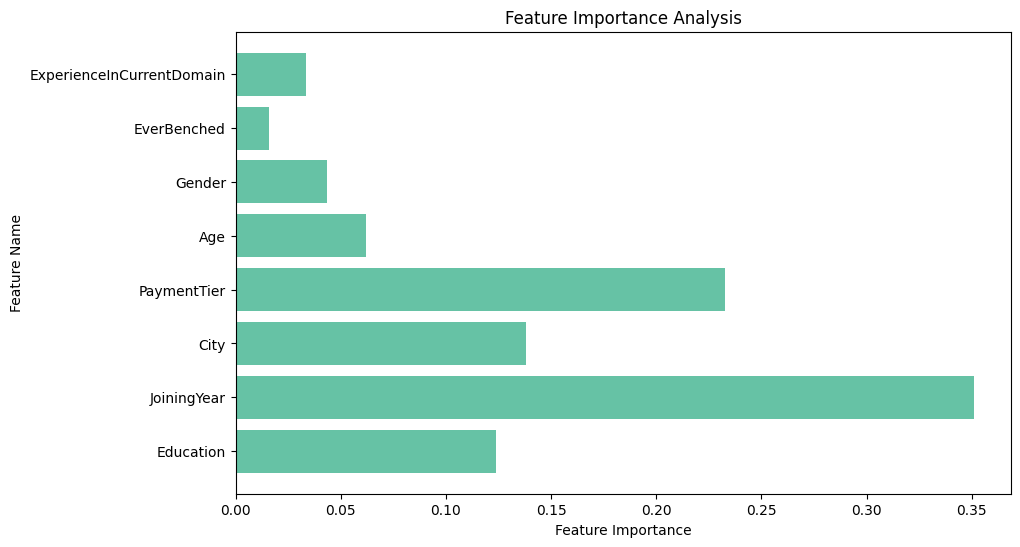

In [103]:
import matplotlib.pyplot as plt

# Feature importance
feature_importances = best_gbc.feature_importances_
feature_names = X_train.columns

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importances)
plt.xlabel("Feature Importance")
plt.ylabel("Feature Name")
plt.title("Feature Importance Analysis")
plt.show()



The graph shows that 'Joining Year,' 'Payment Tier,' and 'City' are the most influential factors in determining whether an employee will leave. This insight helps prioritize areas for HR to focus on in their retention strategies.


________________________________________________________________________________

From here its not mandatory but learned a bit across internet and would like to try what happens

**further tuning**

In [104]:
# Adjust other hyperparameters
param_grid_extended = {
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0],
    'min_samples_split': [2, 4, 6],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialize GridSearchCV
grid_search_extended = GridSearchCV(estimator=gbc, param_grid=param_grid_extended,
                                    scoring='accuracy', cv=5, verbose=1, n_jobs=-1)

# Fit the model using GridSearchCV
grid_search_extended.fit(X_train, y_train)

# Extract the best parameters
best_params_extended = grid_search_extended.best_params_
best_score_extended = grid_search_extended.best_score_

print("\nExtended Best Parameters: ", best_params_extended)
print("Extended Best Cross-Validation Score: ", best_score_extended)

# Evaluate the tuned model
best_gbc_extended = GradientBoostingClassifier(**best_params_extended, random_state=0)
best_gbc_extended.fit(X_train, y_train)
y_pred_gbc_extended = best_gbc_extended.predict(X_test)

# Evaluation metrics
accuracy_gbc_extended = accuracy_score(y_test, y_pred_gbc_extended)
precision_gbc_extended = precision_score(y_test, y_pred_gbc_extended)
recall_gbc_extended = recall_score(y_test, y_pred_gbc_extended)
f1_gbc_extended = f1_score(y_test, y_pred_gbc_extended)

print("\nExtended Tuned Gradient Boosting Classifier Performance:")
print("Accuracy: ", accuracy_gbc_extended)
print("Precision: ", precision_gbc_extended)
print("Recall: ", recall_gbc_extended)
print("F1 Score: ", f1_gbc_extended)


Fitting 5 folds for each of 972 candidates, totalling 4860 fits

Extended Best Parameters:  {'learning_rate': 0.05, 'max_depth': 4, 'max_features': 'auto', 'min_samples_split': 6, 'n_estimators': 200, 'subsample': 1.0}
Extended Best Cross-Validation Score:  0.8523890763937135

Extended Tuned Gradient Boosting Classifier Performance:
Accuracy:  0.8496563573883161
Precision:  0.8609271523178808
Recall:  0.6615776081424937
F1 Score:  0.7482014388489209


**Adjust Decision Threshold to Balance Recall and Precision**

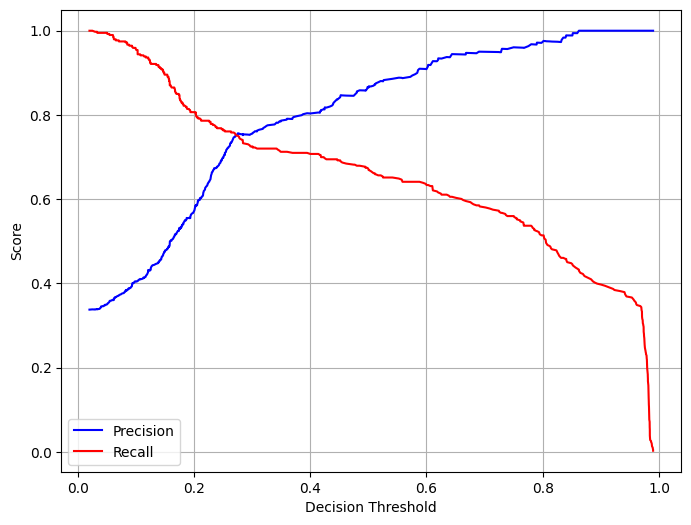


Adjusted Gradient Boosting Classifier Performance:
Accuracy:  0.8427835051546392
Precision:  0.8034682080924855
Recall:  0.7073791348600509
F1 Score:  0.7523680649526386


In [105]:
import numpy as np
from sklearn.metrics import precision_recall_curve

# Predict probabilities
y_probs_gbc = best_gbc.predict_proba(X_test)[:, 1]

# Compute precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_probs_gbc)

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(thresholds, precision[:-1], "b-", label="Precision")
plt.plot(thresholds, recall[:-1], "r-", label="Recall")
plt.xlabel("Decision Threshold")
plt.ylabel("Score")
plt.legend(loc="best")
plt.grid(True)
plt.show()

# Adjust decision threshold
optimal_threshold = 0.4  # Example threshold, adjust based on your analysis
y_pred_gbc_adjusted = (y_probs_gbc >= optimal_threshold).astype(int)

# Evaluate adjusted model
accuracy_gbc_adjusted = accuracy_score(y_test, y_pred_gbc_adjusted)
precision_gbc_adjusted = precision_score(y_test, y_pred_gbc_adjusted)
recall_gbc_adjusted = recall_score(y_test, y_pred_gbc_adjusted)
f1_gbc_adjusted = f1_score(y_test, y_pred_gbc_adjusted)

print("\nAdjusted Gradient Boosting Classifier Performance:")
print("Accuracy: ", accuracy_gbc_adjusted)
print("Precision: ", precision_gbc_adjusted)
print("Recall: ", recall_gbc_adjusted)
print("F1 Score: ", f1_gbc_adjusted)


this curve and the metrics shows that the Adjusted Gradient Boosting Classifier performs well overall, with particular strength in precision at higher decision thresholds, but there may be room to explore balancing recall and precision further.